# Classification vs Regression

This is a binary classification problem because the target variable we're trying to predict is one of two values, "yes" or "no", which represents whether each student passed or failed, respectively. The students that need intervention are ones who are classified to fail by the resulting model.

# Exploring the data

In [11]:
import pandas as pd

descriptions = [
    ['Total number of students', 395],
    ['Number of students who passed', 265],
    ['Number of students who failed', 130],
    ['Graduation rate of the class (%)', '67.09%'],
    ['Number of features (excluding the label/target column)', 30]]

pd.DataFrame(descriptions, columns=['Fact', 'Value'])

,Fact,Value
0,Total number of students,395
1,Number of students who passed,265
2,Number of students who failed,130
3,Graduation rate of the class (%),67.09%
4,Number of features (excluding the label/target...,30


# Training and Evaluating Models

In [16]:
import numpy as np
data = pd.DataFrame(np.array([['Perceptron', 'set size: 100', 0.7814569536423841,
        0.7852760736196319, 0.00015091896057128906, 0.000164031982421875,
        0.0007889270782470703],
       ['Perceptron', 'set size: 200', 0.7662337662337663,
        0.7987987987987988, 0.00013303756713867188, 0.00015592575073242188,
        0.0009539127349853516],
       ['Perceptron', 'set size: 300', 0.5684210526315788,
        0.5833333333333333, 0.00021910667419433594, 0.00024008750915527344,
        0.0016150474548339844],
       ['SVC', 'set size: 100', 0.7538461538461537, 0.9242424242424244,
        0.0005400180816650391, 0.0005660057067871094, 0.0017540454864501953],
       ['SVC', 'set size: 200', 0.7727272727272728, 0.8958333333333334,
        0.0008289813995361328, 0.001886129379272461, 0.00866389274597168],
       ['SVC', 'set size: 300', 0.7769784172661871, 0.8878923766816144,
        0.000988006591796875, 0.003258943557739258, 0.011224985122680664],
       ['KNeighborsClassifier', 'set size: 100', 0.6666666666666666,
        0.823529411764706, 0.000865936279296875, 0.0010030269622802734,
        0.0004379749298095703],
       ['KNeighborsClassifier', 'set size: 200', 0.6666666666666667,
        0.8612099644128113, 0.001260995864868164, 0.0024390220642089844,
        0.0004730224609375],
       ['KNeighborsClassifier', 'set size: 300', 0.7218045112781954,
        0.8868778280542986, 0.0022058486938476562, 0.004817962646484375,
        0.0006139278411865234],
       ['RandomForestClassifier', 'set size: 100', 0.7301587301587301,
        0.9921259842519685, 0.0007710456848144531, 0.0009050369262695312,
        0.02305006980895996],
       ['RandomForestClassifier', 'set size: 200', 0.7301587301587301,
        0.9962264150943396, 0.0009860992431640625, 0.0015110969543457031,
        0.02185988426208496],
       ['RandomForestClassifier', 'set size: 300', 0.7518796992481203,
        0.9927007299270073, 0.0009031295776367188, 0.0015668869018554688,
        0.018795013427734375],
       ['GradientBoostingClassifier', 'set size: 100', 0.6956521739130435,
        1.0, 0.0003459453582763672, 0.0005271434783935547,
        0.10326290130615234],
       ['GradientBoostingClassifier', 'set size: 200', 0.7424242424242425,
        1.0, 0.0003809928894042969, 0.0007128715515136719,
        0.17937588691711426],
       ['GradientBoostingClassifier', 'set size: 300', 0.7377049180327869,
        1.0, 0.0008370876312255859, 0.0014290809631347656,
        0.30495405197143555],
       ['AdaBoostClassifier', 'set size: 100', 0.7659574468085107,
        0.8053691275167786, 0.028378009796142578, 0.028654098510742188,
        0.157822847366333],
       ['AdaBoostClassifier', 'set size: 200', 0.7586206896551724,
        0.8116883116883117, 0.023633956909179688, 0.05046200752258301,
        0.16454482078552246],
       ['AdaBoostClassifier', 'set size: 300', 0.7619047619047619,
        0.8198757763975155, 0.1369490623474121, 0.4037151336669922,
        1.134105920791626]], dtype=object), columns=[u'clf', u'description', u'f1_score_test', u'f1_score_train',
       u'time_predict_test', u'time_predict_train', u'time_train'])

### Perceptron

The Perceptron model is used for binary classification problems.
Its main strengths are that it is simple, training and predicting times are fast, and the model performs well for many linearly-separable data, but won't work well on non-linear data.
Perceptrons are the basis of more complicated neural networks, which combine multiple perceptrons in multiple layers to solve more complex problems that single perceptrons couldn't solve.

I chose this model because I thought it'd be a good benchmarking point to start off the analysis, since the problem of predicting failing students is a binary classification problem.

In [17]:
data[data['clf'] == 'Perceptron']

,clf,description,f1_score_test,f1_score_train,time_predict_test,time_predict_train,time_train
0,Perceptron,set size: 100,0.781457,0.785276,0.000150919,0.000164032,0.000788927
1,Perceptron,set size: 200,0.766234,0.798799,0.000133038,0.000155926,0.000953913
2,Perceptron,set size: 300,0.568421,0.583333,0.000219107,0.000240088,0.00161505


### K-nearest neighbors

k-nearest neighbors is a non-parametric model used for both classification and regression problems.
It works well when there are exponential amounts of rows of data with respect to the number of columns, such that the data is evenly spread out among the dimensions. If the training data does not cover the space of each dimension well, then the model may not work well. 

This algorithm performs "lazy" training, which means that when new data is added, it doesn't have to recompute the model, but querying for predictions takes longer since the model has to seach through the data and find the nearest neighbors of the query.

I chose this model because it is a classification algorithm known to work very well in many cases, and though I knew that the dataset for this assignment did not have *vast* amounts of data points with respect to the number of features, I thought it might be worth a try.

In [18]:
data[data['clf'] == 'KNeighborsClassifier']

,clf,description,f1_score_test,f1_score_train,time_predict_test,time_predict_train,time_train
6,KNeighborsClassifier,set size: 100,0.666667,0.823529,0.000865936,0.00100303,0.000437975
7,KNeighborsClassifier,set size: 200,0.666667,0.86121,0.001261,0.00243902,0.000473022
8,KNeighborsClassifier,set size: 300,0.721805,0.886878,0.00220585,0.00481796,0.000613928


### Support Vector Machine

Support vector machines are used for both classification and regression problems, and generally work well for many types of problems. The algorithm also has ways to fit data using higher-dimensional feature space, which makes it versatile. A drawback of this algorithm is that training time is slower than simpler models like the perceptron, though prediction time is fast.

I chose this model because of its versatility and knew that it performs well for binary classification problems. Given that the dataset in this assignment is not that big (300 rows and 30 columns in training data doesn't seem very big compared to a lot of other datasets these days), I felt confident that running SVM on it won't take very long despite the expected high training time.

In [19]:
data[data['clf'] == 'SVC']

,clf,description,f1_score_test,f1_score_train,time_predict_test,time_predict_train,time_train
3,SVC,set size: 100,0.753846,0.924242,0.000540018,0.000566006,0.00175405
4,SVC,set size: 200,0.772727,0.895833,0.000828981,0.00188613,0.00866389
5,SVC,set size: 300,0.776978,0.887892,0.000988007,0.00325894,0.011225


### Random Forest

Random Forests are used for both classification and regression problems, and also work generally well for many types of problems. Their drawbacks are that training takes a long time, and that because it learns so well, the user has to be especially careful about overfitting, especially if data is noisy.

I used this model because they are known to perform very well whether the dataset is big or small, and also I thought it'd be a good thing to compare the results of the random forest classifier with support vector machines.

In [20]:
data[data['clf'] == 'RandomForestClassifier']

,clf,description,f1_score_test,f1_score_train,time_predict_test,time_predict_train,time_train
9,RandomForestClassifier,set size: 100,0.730159,0.992126,0.000771046,0.000905037,0.0230501
10,RandomForestClassifier,set size: 200,0.730159,0.996226,0.000986099,0.0015111,0.0218599
11,RandomForestClassifier,set size: 300,0.75188,0.992701,0.00090313,0.00156689,0.018795


### Gradient Boosting Classifier & Ada Boost Classifier



Boosting methods are powerful ways to increase the performance of other learning algorithms ("weak learners"), but they may not perform well if the data is noisy.

I choose these algorithms because I wanted to see if I can improve the performance of the other learning algorithms using "boosting".

In [21]:
data[data['clf'].str.find("Boost") > -1]

,clf,description,f1_score_test,f1_score_train,time_predict_test,time_predict_train,time_train
12,GradientBoostingClassifier,set size: 100,0.695652,1,0.000345945,0.000527143,0.103263
13,GradientBoostingClassifier,set size: 200,0.742424,1,0.000380993,0.000712872,0.179376
14,GradientBoostingClassifier,set size: 300,0.737705,1,0.000837088,0.00142908,0.304954
15,AdaBoostClassifier,set size: 100,0.765957,0.805369,0.028378,0.0286541,0.157823
16,AdaBoostClassifier,set size: 200,0.758621,0.811688,0.023634,0.050462,0.164545
17,AdaBoostClassifier,set size: 300,0.761905,0.819876,0.136949,0.403715,1.13411


# Choosing the best Model

The most important indicator for the performance of the different models is the f1_score for the test set using all the training data. Among the top performing models, the time taken to predict and train should then be considered to choose the most practical model for this problem, given the resource constraints. The table below shows the models sorted by decreasing F1 scores on the test data

In [31]:
data[data.description == 'set size: 300'].sort_values('f1_score_test', ascending=False)[['clf', 'f1_score_test', 'time_train', 'time_predict_test']]

,clf,f1_score_test,time_train,time_predict_test
5,SVC,0.776978,0.011225,0.000988007
17,AdaBoostClassifier,0.761905,1.13411,0.136949
11,RandomForestClassifier,0.75188,0.018795,0.00090313
14,GradientBoostingClassifier,0.737705,0.304954,0.000837088
8,KNeighborsClassifier,0.721805,0.000613928,0.00220585
2,Perceptron,0.568421,0.00161505,0.000219107


The top 3 candidates are SVC, AdaBoostClassifier, and RandomForestClassifier, whose f1 scores are all within .03 of each other. I felt that the right parameters of each of the models can affect the final performances of these models, so I went ahead and optimized all three models.

On the test dataset, SVM's final f1 score was 0.795, Random Forest scored 0.808 and the Ada Boost Classifier using SVM as the base model scored 0.766. Between SVM and Random Forest, the time to predict (0.011 seconds vs 0.019 seconds, respectively) and time to train are very similar to each other (both less than .001 second on the test set). They are both known to have issues with slower training times with large datasets, and both are able to run predictions very quickly. Therefore, since Random Forest had a higher final f1 score, the Random Forest Classifier is the best choice.
Furthermore, it provides an additional parameter, n_jobs, which utilizes parallel processing to find results more quickly, while SVC doesn't. Therefore, we can reduce the time it takes to run it, and since many cloud services charge based on server uptime rather than number of job processes, and each node usually has multiple processors, we can utilize those models to increase cost-efficiency.

## Brief review on Random Forests Classifiers

### Random Forests

Random forests are a tool used to make predictions, in our case, whether a student is at risk of failing a class or not. We feed the program a bunch of historical data about past students that have passed and other students that have failed, and the tool "learns" the data in such a way that when we present it with a new student who is currently taking the class, the program will make a prediction on whether he or she will pass the class. It's not always 100% accurate, but it predicts with a high level of accuracy such that we can use it to help students who are at risk of failing, and help them pass the class.

Random forests are basically more than one (could be just a few, could be hundreds or even thousands) decision trees, each that casts a vote to decide the final prediction for an observed data point. In our case, the optimized model had 15 trees. That means that each of the 15 trees would predict whether a student is going to fail or not, and each would cast a vote with how certain it is of a given prediction provided as a probability. For example, for a given student Bob, if 10 trees predicted that Bob would pass with a probability of .75, and 5 trees predicted that Bob would fail with probability .5, then the entire random forest would make the final prediction that Bob would pass.

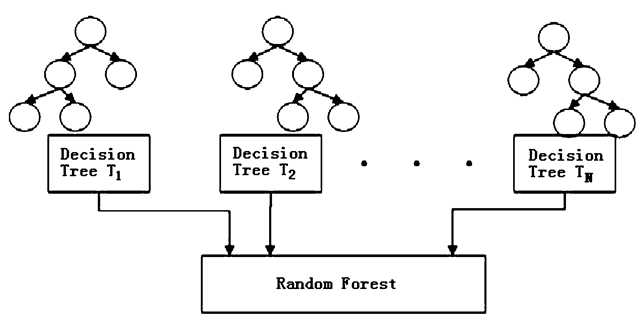

In [1]:
from IPython.display import Image
Image('http://what-when-how.com/wp-content/uploads/2012/06/tmp35b0459_thumb.png')

Image taken from http://what-when-how.com

### How does each decision tree work?

Each decision tree takes some of the historical data about past students who have passed and some who have failed, and creates a set of questions. Based on the answers to these questions, the decision tree will decide whether a new student like Bob is at risk of failing or not. The followign diagram shows an example of a decision tree on our student data.

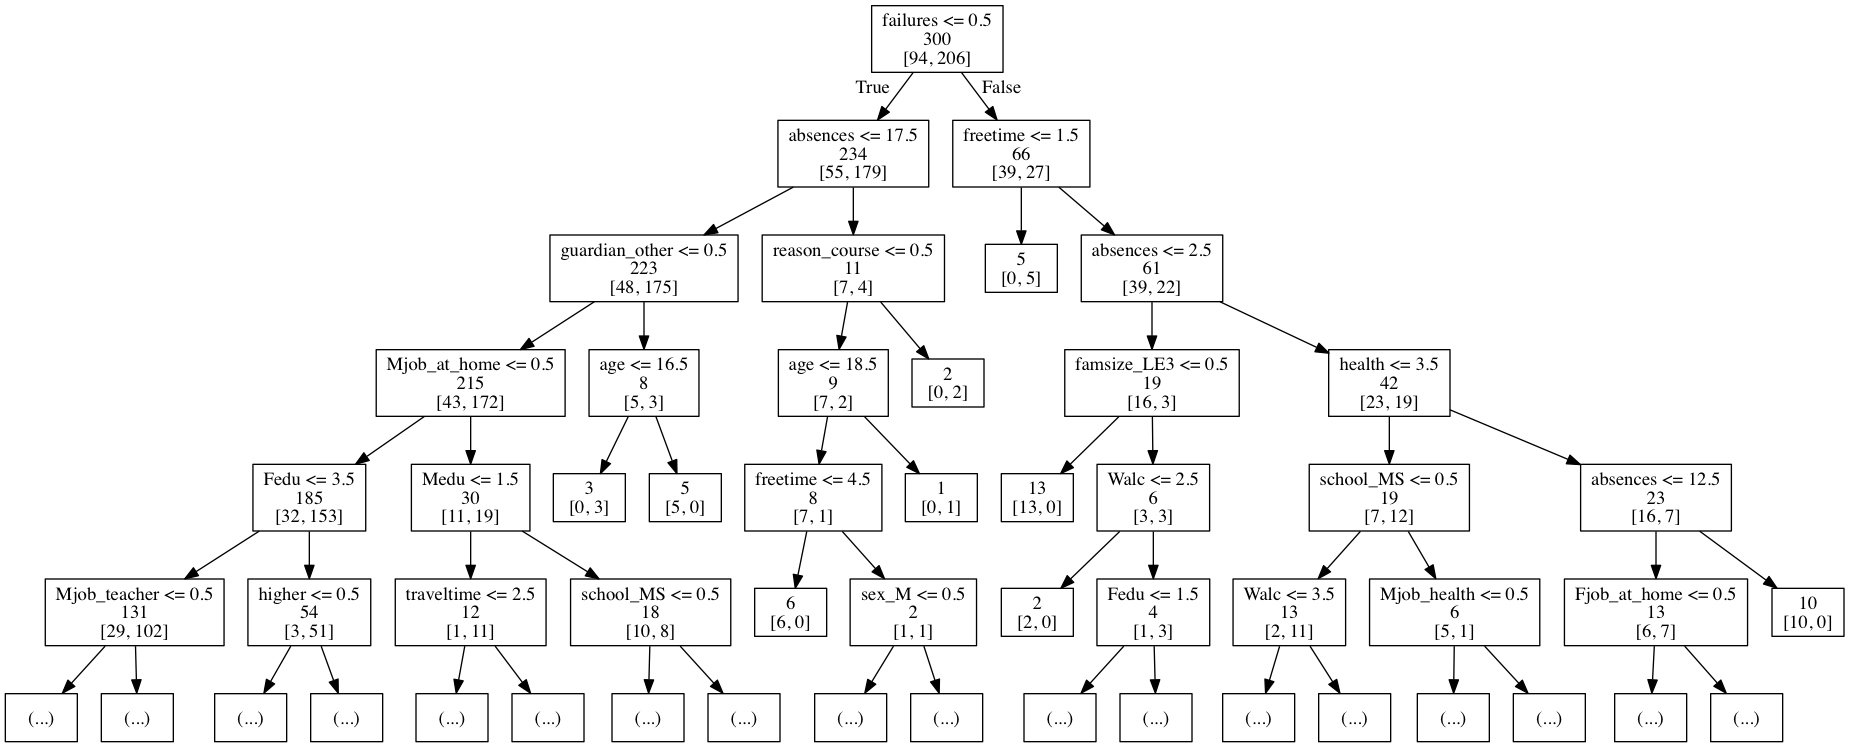

In [4]:
Image('tree.png')

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier(random_state=0)
# clf.fit(X_train, y_train)
# from sklearn.tree import export_graphviz
# export_graphviz(clf, feature_names=X_train.columns, class_names=['Fail', 'Pass'], label='none', impurity=False, max_depth=5)

In the tree shown above, each box represents a question, and basd on the answer, we'd follow the corresponding arrows to the next question until we run out of questions, at which the tree will present us with an answer. For example, we take Bob, and the first question we'd ask is "What is the failure rate of Bob in previous classes?". If the answer is less than or equal to 0.5, then the next question is "How many absences has Bob had?". Based on that answer, we'd go left if True, right if false, and so on. The numbers in each box respresent statistics about the historical data that the tree used to train on.

Each tree has a different set of questions that are built from a different subset of the historical students data, so not all trees would come up with the final prediction at the end. That is why the random forest takes the votes of several trees into account, in order to get a higher-confidence prediction.

#### For those that are interested in the technical details

Each tree is built by training on its sampled training data, which are the same size as the training set, but contains random repeats (bootstrapping), which is a way to decrease variance due to noise during training.

During training, each decision tree is looks for the best way to branch down based on the information content of each attribute in the training data. The attributes that make it easier to make predictions on the data points are selected first, which results in the shortest trees possible. The tree is branched down until only a single class of target values are left in the leaf of the branch, or until the `max_depth` or `min_samples_split` values have been reached.

Once the forest of decision trees are trained, when new data points are inputted, each tree will traverse down its branches using the values of the data points' attributes until the final leaf containing the prediction target value, and cast its vote. The final output of the random forest classifier is the elected prediction based on weighted average of the probability scores of each tree.

## Final F1 Score
The final F1 Score of the random forest classifier is 0.808